<a href="https://colab.research.google.com/github/Likke77/CHURN_TELECOM/blob/main/churn_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing all datasets
churn_data = pd.read_csv('/content/churn_data (1).csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data = pd.read_csv("/content/customer_data (1).csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet_data = pd.read_csv("/content/internet_data (1).csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [6]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [7]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [8]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [9]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
# Checking Null values
telecom.isnull().sum()*100/telecom.shape[0]
# There are no NULL values in the dataset, hence it is clean.

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

In [11]:
telecom['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [12]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [13]:
value = (telecom['TotalCharges']/telecom['MonthlyCharges']).median()*telecom['MonthlyCharges']

In [14]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other =telecom['TotalCharges'])

In [15]:
telecom['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [16]:
telecom.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

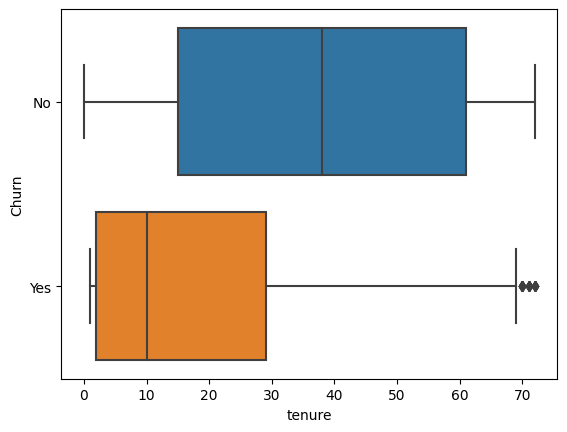

In [19]:
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom)
plt.show()

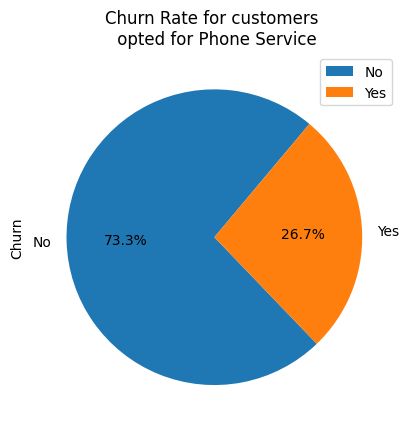

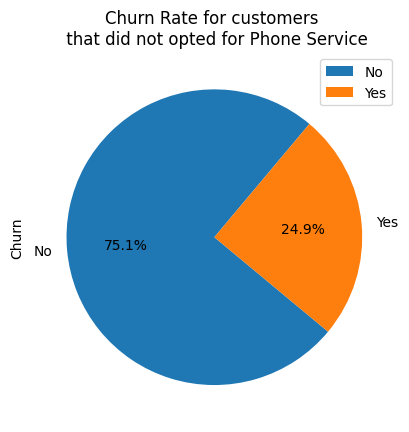

In [20]:
pie_PhoneService_Yes = pd.DataFrame(telecom[telecom['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(telecom[telecom['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')

plt.show()

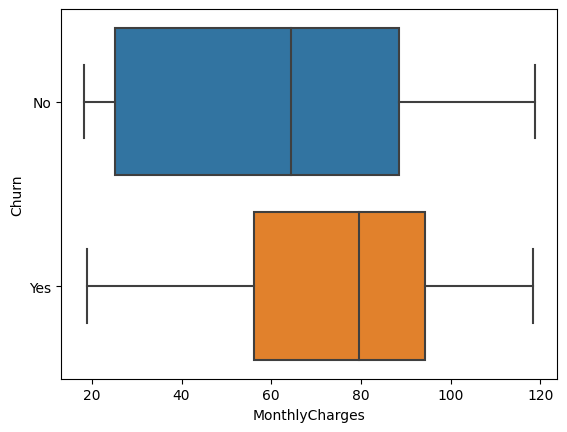

In [21]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom)
plt.show()

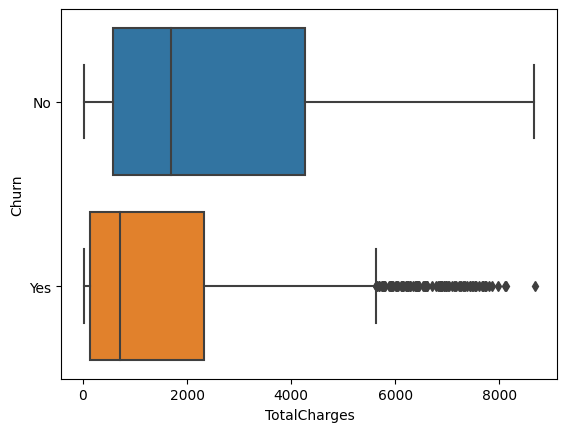

In [22]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data = telecom)
plt.show()

<Figure size 1500x500 with 0 Axes>

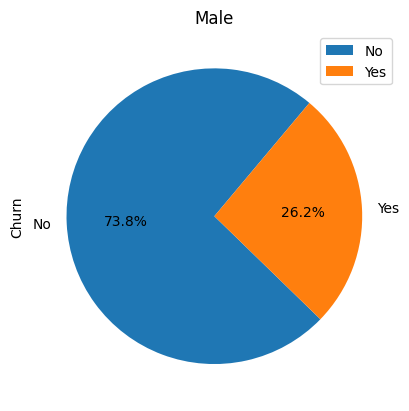

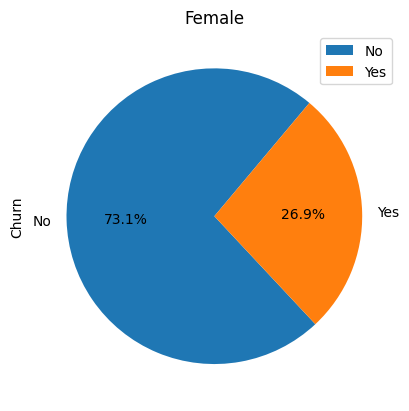

In [23]:
plt.figure(figsize=(15,5))
pie_Gender_M = pd.DataFrame(telecom[telecom['gender'] == "Male"]['Churn'].value_counts())
pie_Gender_M.plot.pie(subplots = True, labels = pie_Gender_M.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Male')
plt.gca().set_aspect('equal')

pie_Gender_F = pd.DataFrame(telecom[telecom['gender'] == "Female"]['Churn'].value_counts())
pie_Gender_F.plot.pie(subplots = True,  labels = pie_Gender_F.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Female')

plt.gca().set_aspect('equal')
plt.show()

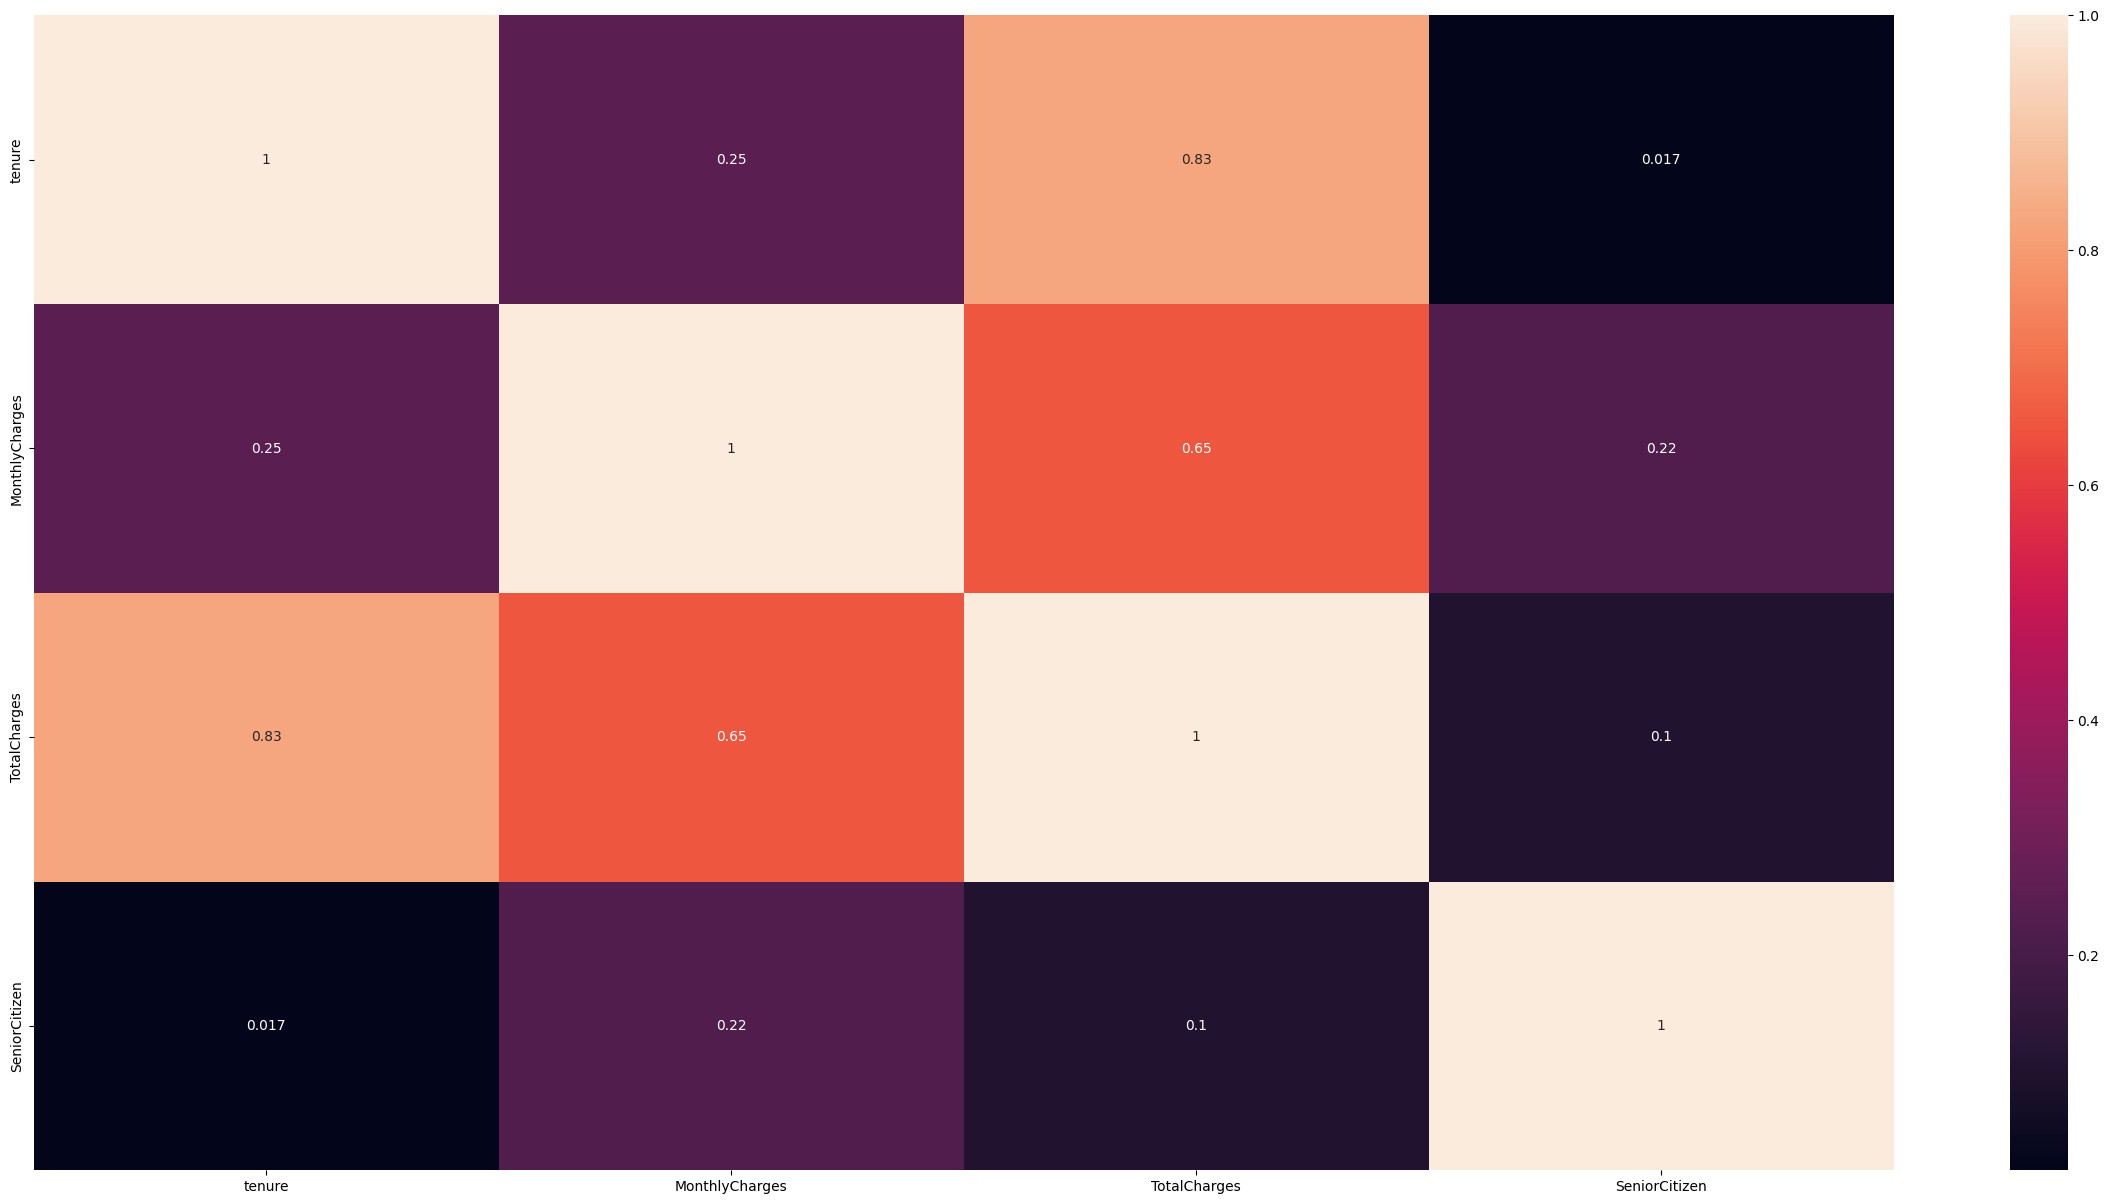

In [24]:
# Let's see the correlation matrix
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [30]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [31]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
877,0.754422,No,One year,No,Bank transfer (automatic),-0.145568,0.348921,Female,0,No,Yes,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes
5792,-0.710751,Yes,Month-to-month,Yes,Mailed check,1.051796,-0.380014,Female,1,No,No,No,Fiber optic,Yes,No,Yes,Yes,No,Yes
5334,0.673024,Yes,Two year,Yes,Bank transfer (automatic),1.437668,1.327842,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes
878,1.120716,Yes,One year,No,Electronic check,0.006794,0.774068,Female,0,No,No,Yes,DSL,Yes,No,Yes,Yes,No,No
6578,-0.914247,Yes,One year,No,Credit card (automatic),0.298268,-0.703987,Female,0,No,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes
